The purpose of this notebook is to find solutions of the Lane-Emden equation relevant for polytropic models of stars.

First, we must import the necessary files.

In [1]:
from scipy.integrate import odeint
from scipy.optimize import root_scalar
import numpy as np
import matplotlib.pyplot as plt

Now we define the Lane-Emden equation as two first order derivatives.  Also add a tiny amount to the denominator of one term to avoid overflows and take the absolute value of $\theta$ in taking powers because this is a problem for some n values.  In our treatment, where we are only considering physically relevant solutions (with $\theta \geq 0$), this last point is only an issue near the root when we are root finding.  Near the root, the $\theta^n$ term contributes negligibly to the derivative.

In [2]:
def lane_emden(y, x, n):
    theta, dtheta = y
    dydx = [dtheta, -2. * dtheta / (x + 1.e-300) - np.power(np.abs(theta), n)]
    return dydx

Now we set up the root function.

In [3]:
def f(x, n):
    assert(n < 5)
    y0 = [1., 0.]
    xsol = np.linspace(0, x, 101)
    sol = odeint(lane_emden, y0, xsol, args=(n,))
    return sol[sol.shape[0]-1, 0]

Now we choose n.

In [4]:
n = 3

Now find the root.

In [5]:
sol = root_scalar(f, x0 = 1, x1 = 2, args=(n,))

With the root, create the solution.

In [6]:
x = np.linspace(0, sol.root, 101)
msol = odeint(lane_emden, [1., 0.], x, args=(n,))

Retrieve the first zero and derivative.

In [7]:
xsi1 = sol.root
dxsi1 = msol[msol.shape[0]-1, 1]

print("xsi_1 = ", xsi1, ", dtheta / dxi_1 = ", dxsi1)

xsi_1 =  6.896848189605434 , dtheta / dxi_1 =  -0.04242975549742538


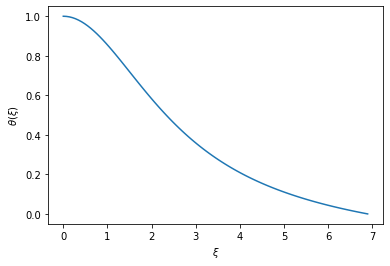

In [8]:
plt.plot(x, msol[:,0])
plt.xlabel("$\\xi$")
plt.ylabel("$\\theta(\\xi)$")
plt.show()